In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
T = 1000
K = 20
prices = np.linspace(0,1,K)

coef = np.random.uniform(0.5,3,T)
conversion_probability = np.zeros((T,K))
for i in range(T):
    conversion_probability[i]=(np.ones(K)-coef[i]*prices)*(np.ones(K)-coef[i]*prices >0)

cost = 0
reward_sequence = conversion_probability*(prices-cost)

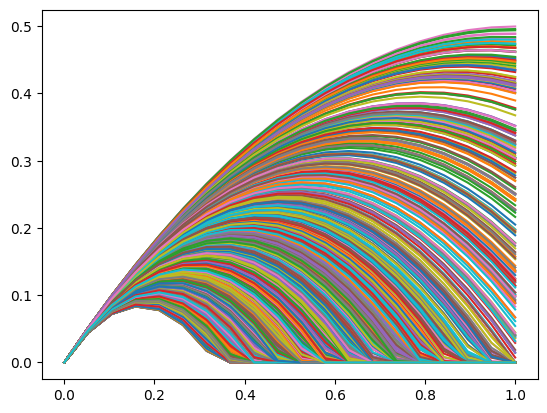

In [14]:
for i in range(T):
    plt.plot(prices,reward_sequence[i])

In [15]:
print(f'Best achievable cumulative reward when always pulling the same arm: {reward_sequence.sum(axis=0).max()}')
best_arm = np.argmax(reward_sequence.sum(axis=0))
print(f'Which is obtained with the best arm in hindsight: {best_arm}')
clairvoyant_reward = reward_sequence[:, best_arm]

Best achievable cumulative reward when always pulling the same arm: 140.5691483820662
Which is obtained with the best arm in hindsight: 5


In [16]:
class AdversarialExpertEnvironment:
    def __init__(self, reward_sequence):
        self.reward_sequence = reward_sequence
        self.t = 0

    def round(self): # we do not need to receive a specific arm
        r_t = self.reward_sequence[self.t, :] ## we return the whole loss vector
        self.t+=1
        return r_t

In [17]:
class HedgeAgent:
    def __init__(self, K, learning_rate):
        self.K = K
        self.learning_rate = learning_rate
        self.weights = np.ones(K)
        self.x_t = np.ones(K)/K
        self.a_t = None
        self.t = 0

    def pull_arm(self):
        self.x_t = self.weights/sum(self.weights)
        self.a_t = np.random.choice(np.arange(self.K), p=self.x_t)
        return self.a_t

    def update(self, r_t):
        self.weights *= np.exp(-self.learning_rate*(1-r_t))
        self.t += 1

In [18]:
learning_rate = np.sqrt(np.log(K)/T) # we set the learning rate as prescribed by the theory

agent = HedgeAgent(K, learning_rate)
env = AdversarialExpertEnvironment(reward_sequence)

# we log to different cumulative losses for the agent
agent_reward = np.array([])
expected_agent_reward = np.array([])

for t in range(T):
    a_t = agent.pull_arm()
    r_t = env.round()
    agent.update(r_t)
    # logging
    agent_reward = np.append(agent_reward, r_t[a_t])
    expected_agent_reward = np.append(expected_agent_reward, np.dot(r_t, agent.x_t))


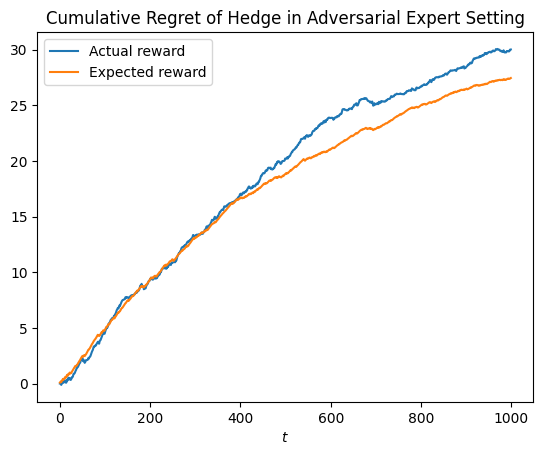

In [19]:
plt.plot(np.cumsum(clairvoyant_reward-agent_reward), label='Actual reward')
plt.plot(np.cumsum(clairvoyant_reward-expected_agent_reward), label='Expected reward')
plt.title('Cumulative Regret of Hedge in Adversarial Expert Setting')
plt.xlabel('$t$')
plt.legend()
plt.show()

In [21]:
print(f'Best arm in hindsight: {best_arm}')
print(f'Final allocation :{np.round(agent.x_t,2)}') # the best arm is the one having more weight

Best arm in hindsight: 5
Final allocation :[0.   0.   0.01 0.05 0.14 0.22 0.21 0.13 0.08 0.05 0.03 0.02 0.02 0.01
 0.01 0.01 0.   0.   0.   0.  ]


In [45]:
print(f'Theoretical bound: {2*np.sqrt(T*np.log(K))}')
print(f'Actual Total Regret {sum(clairvoyant_reward)-sum(agent_reward)}')
print(f'Expected Total Regret {sum(clairvoyant_reward)-sum(expected_agent_reward)}')

Theoretical bound: 109.46656610223947
Actual Total Regret 26.929542727642954
Expected Total Regret 27.16660820968012
